#빅분기 실기 3유형

---
##고급통계

In [ ]:
# 기본 import
import numpy as np
import pandas as pd

import statsmodels.api as sm

In [ ]:
import statsmodels.api as sm
print(dir(sm))

In [ ]:
print(help(sm.OLS))

In [ ]:
print(help(sm.Logit))

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
mode.summary()


NameError: name 'X' is not defined

###단순회귀분석

In [ ]:
## 데이터 생성 : 온도, 아이스크림 매출
np.random.seed(0)   # 결과의 일관성을 위해 시드 재설정
temp = np.random.randint(20, 35, 100)
sales = temp * 70 - 500 + np.random.normal(0, 100, 100)
df = pd.DataFrame({'temp' : temp, 'sales' : sales})

# 모델링
# 독립변수 생성
X = df['temp']
# 종속변수 생성
y = df['sales']
# 상수화
X = sm.add_constant(X)
# 모델선언 및 학습
model = sm.OLS(y, X).fit()

# 모델결과 출력 ()
result = model.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     680.3
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           6.90e-46
Time:                        07:53:04   Log-Likelihood:                -606.75
No. Observations:                 100   AIC:                             1217.
Df Residuals:                      98   BIC:                             1223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -452.2143     68.982     -6.556      0.0

###다중회귀분석

In [ ]:
## 데이터 생성
df = pd.DataFrame({'Length' : np.random.randint(1, 10, 100), 'Width' : np.random.randint(1, 10, 100), 'Tickness' : np.random.randint(1, 10, 100), 'Fin_Length' : np.random.randint(1, 10, 100), 'Weight' : np.random.randint(1, 10, 100)})

# 모델링
# 독립변수 생성
X = df[['Length', 'Width', 'Tickness', 'Fin_Length']]
# 종속변수 생성
y = df['Weight']
# 상수화
X = sm.add_constant(X)
# 모델선언 및 학습
model = sm.OLS(y, X).fit()

# 모델결과 출력 ()
result = model.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.3178
Date:                Fri, 21 Jun 2024   Prob (F-statistic):              0.865
Time:                        08:09:09   Log-Likelihood:                -238.69
No. Observations:                 100   AIC:                             487.4
Df Residuals:                      95   BIC:                             500.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7167      1.112      3.343      0.0

###다항회귀분석

In [ ]:
## 데이터 생성
np.random.seed(0)
house_size = np.random.uniform(50, 250, 100)
house_size2 = house_size **2
house_price = 5000 + 20 * house_size + 0.2 * house_size**2 + np.random.normal(0, 2000, 100)
df = pd.DataFrame({'house_size' : house_size, 'house_size2' : house_size2, 'house_price' : house_price})

# 모델링
# 독립변수 생성
X = df[['house_size', 'house_size2']]
# 종속변수 생성
y = df['house_price']
# 상수화
X = sm.add_constant(X)
# 모델선언 및 학습
model = sm.OLS(y, X).fit()

# 모델결과 출력 ()
result = model.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     253.2
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           3.15e-39
Time:                        08:13:24   Log-Likelihood:                -900.64
No. Observations:                 100   AIC:                             1807.
Df Residuals:                      97   BIC:                             1815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3835.8351   1312.331      2.923      

###로지스틱회귀분석

In [ ]:
## 데이터 생성
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_filtered = iris_df[(iris_df['species'] == 1) | (iris_df['species'] == 2)]
iris_filtered['species'] = iris_filtered['species'].map({1:0, 2:1})

# 모델링
# 독립변수 생성
X = iris_filtered.drop(columns = ['species'])
# 종속변수 생성
y = iris_filtered['species']
# 상수화
X = sm.add_constant(X)
# 모델선언 및 학습
model = sm.Logit(y, X).fit()

# 모델결과 출력 ()
result = model.summary()
print(result)

# 오즈값
# odz = np.exp(model.params)
# print(model.params)
# print(odz)

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:                  0.9142
Time:                        08:22:59   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal l

<ipython-input-31-ff5349cb3f55>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_filtered['species'] = iris_filtered['species'].map({1:0, 2:1})


---
##가설검정


In [ ]:
# 기본 import
import numpy as np
import pandas as pd

import scipy.stats as stats

In [ ]:
import scipy
print(scipy.__all__)

['cluster', 'constants', 'datasets', 'fft', 'fftpack', 'integrate', 'interpolate', 'io', 'linalg', 'misc', 'ndimage', 'odr', 'optimize', 'signal', 'sparse', 'spatial', 'special', 'stats', 'LowLevelCallable', 'test', 'show_config', '__version__']


In [ ]:
import scipy.stats as stats
print(dir(stats))

# ㄴ 단일표본 T검정 (One Sample T-Test) : ttest_1samp
# ㄴ 독립표본 T검정 (Two Sample T-Test) : ttest_ind
# ㄴ 대응표본(쌍체표본) T검정 (Paired Sample T-Test) ttest_rel
# ㄴ 세집단의 평균비교 ANOVA : f_oneway
# ㄴ 범주형 변수1개 / 카이제곱검정(적합도) : chisquare
# ㄴ 범주형 변수2개 / 카리제곱검정(독립성,동질성 검정) : chi2_contingency

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ansari_swilk_statistics', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_bws_test', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sampling', '_sensitivity_analysis', '_sobol', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_su

In [ ]:
# help(scipy.stats.ttest_1samp)
# help(scipy.stats.ttest_ind)
# help(scipy.stats.ttest_rel)
help(scipy.stats.f_oneway)
# help(scipy.stats.chisquare)
# help(scipy.stats.chi2_contingency)

NameError: name 'scipy' is not defined

###T-TEST

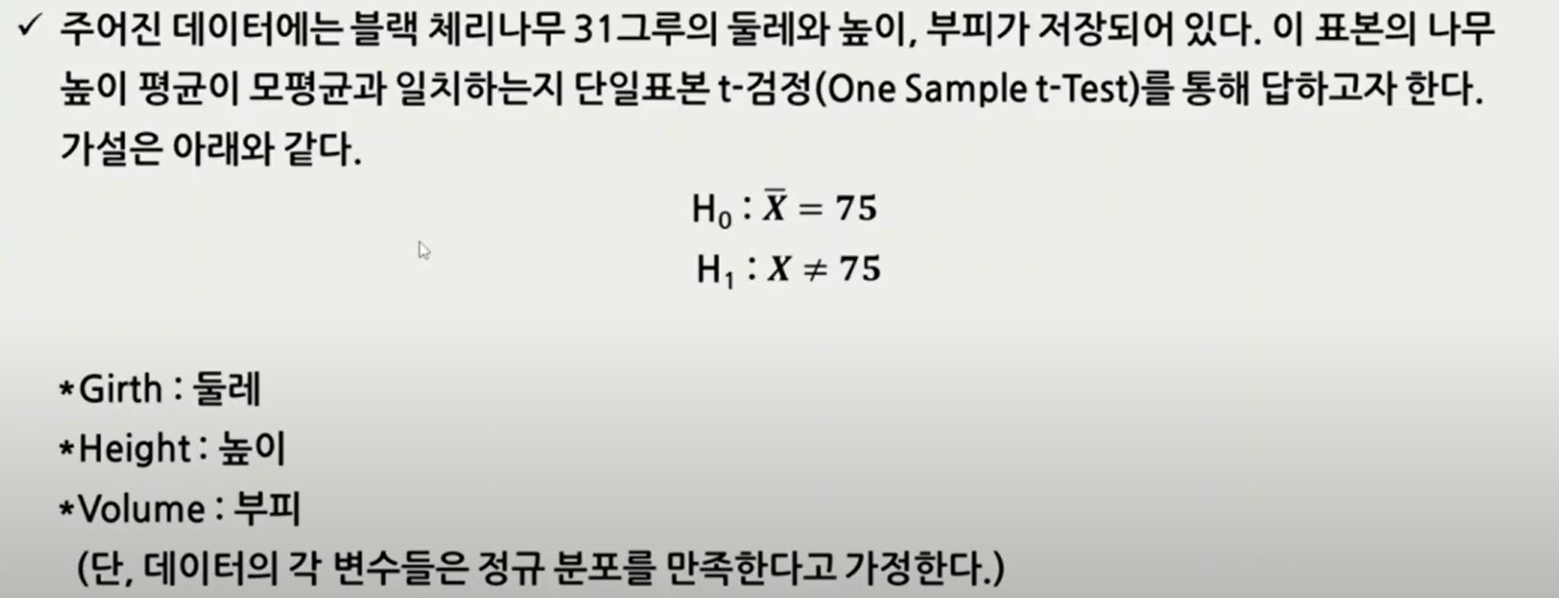

In [ ]:
# ㄴ 단일표본 T검정 (One Sample T-Test) : ttest_1samp
# 데이터 생성
df = pd.DataFrame({'Girth' : [8.3, 8.6, 8.8, 10.5, 10.7], 'Height' : [70, 65, 63, 72, 81], 'Width' : [10.3, 10.3, 10.2, 16.4, 18.8]})

# df.head()

# Q1. 표본평균울 구하시오. (반올림하여 소수 둘째자리까지 계산)
x = round(df['Height'].mean(), 2)
print(x)                            # 70.2
# Q2. 위 가설을 검정하기 위한 검정 통계량을 구하시오 (반올림하여 소수 둘째자리까지 계산)
stats, pval = stats.ttest_1samp(df['Height'], 75)
stats = round(stats, 2) # -1.52
pval = round(pval, 4)   # 0.2026
print(stats, pval)                  # -1.52 0.2026
# Q3. 위 통계량에 대한 p값을 구하고 (반올림하여 소수 넷째자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하시오

result = '채택'

if pval < 0.5 :
  result = '기각'

print(result)



70.2
-1.52 0.2026
기각


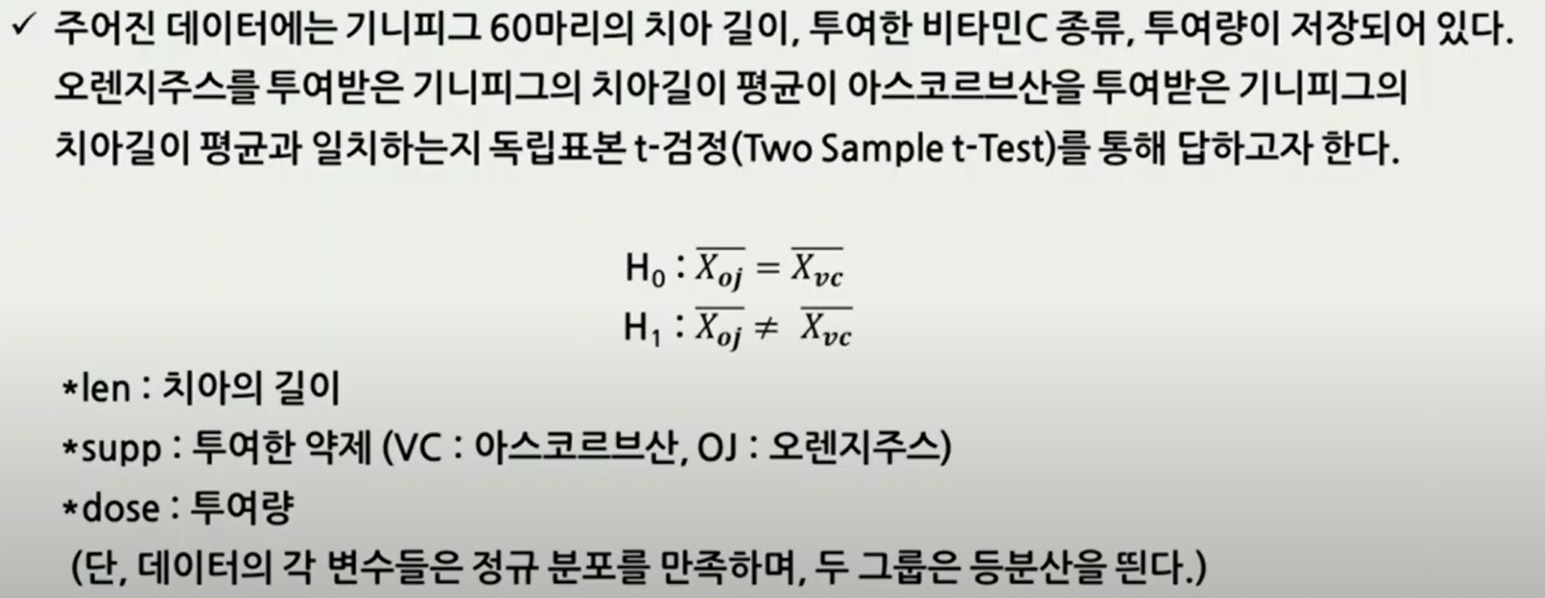

In [ ]:
# ㄴ 독립표본 T검정 (Two Sample T-Test) : ttest_ind
# 데이터 생성

# Q1. 표본평균울 구하시오 (Xoj, Xvc). (반올림하여 소수 둘째자리까지 계산)
oj_len = df['len'][df['supp'] == 'OJ']
vc_len = df['len'][df['supp'] == 'VC']

print(round(oj_len.mean, 2)
print(round(vc_len.mean, 2)

# Q2. 위 가설을 검정하기 위한 검정 통계량을 구하시오 (반올림하여 소수 둘째자리까지 계산)
stats, pval = stats.ttest_ind(vc_len, oj_len)
print(stats, pval)                  # -1.92 0.0604
# Q3. 위 통계량에 대한 p값을 구하고 (반올림하여 소수 넷째자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하시오
result = '채택'

if pval < 0.5:
      result = '기각'

print(result)


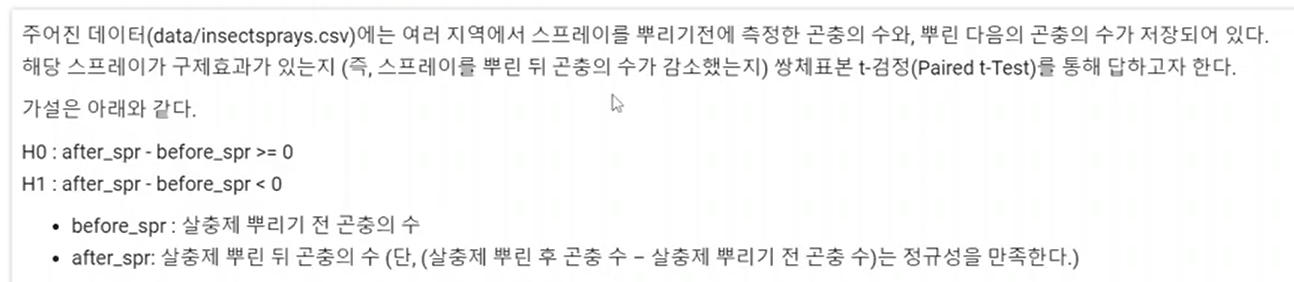

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats

# ㄴ 대응표본(쌍체표본) T검정 (Paired Sample T-Test) ttest_rel
# 데이터 생성
df = pd.DataFrame({'before_spr' : [10, 7, 20, 14, 14], 'after_spr' : [0, 1, 7, 2, 3]})
# df.head()
# # Q1. 살충제 뿌리기 전/후의 곤충수 차이의 표본평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
# after_spr - before_spr
diff = df['after_spr'] - df['before_spr']
mean_of_diff = round(diff.mean(), 2)
print(mean_of_diff)   # -10.4

# # Q2. 위 가설을 검정하기 위한 검정 통계량을 구하시오 (반올림하여 소수 둘째자리까지 계산)
# two sided(양측검정), less(왼쪽), greater(오른쪽)
stats, pval = stats.ttest_rel(df['after_spr'], df['before_spr'], alternative='less')
stats = round(stats, 2)
pval = round(pval, 4)
print(stats, pval)

# # Q3. 위 통계량에 대한 p값을 구하고 (반올림하여 소수 넷째자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하시오
result = '채택'

if pval < 0.5:
  result = '기각'

print(result)

-10.4
-8.61 0.0005
기각


###카이스퀘어(적합도 검정, (독립성, 동질성 검정)

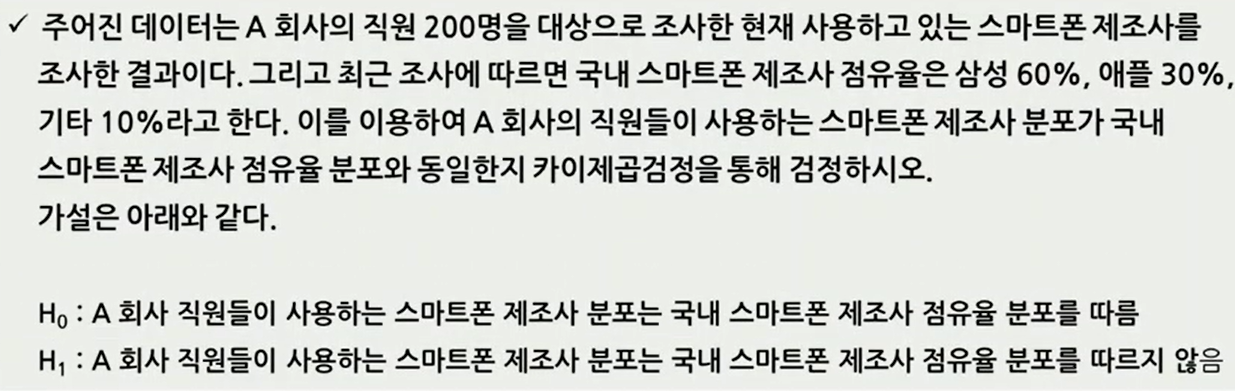

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# ㄴ 범주형 변수1개 / 카이제곱검정(적합도) : chisquare
# 데이터 생성
df = pd.DataFrame({'id' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], '제조사' : ['삼성', '애플', '삼성', '애플', '삼성', '삼성', '애플', '애플', '기타', '삼성', '애플', '기타', '삼성', '삼성', '삼성', '삼성', '애플', '삼성', '애플', '삼성']})
# df.head()

# # # Q1. 삼성 제조사 스마트폰 사용 직원 수에서 애플 제조사 스마트폰 사용 직원 수를 뺀 값을 정수로 출력하시오.
count_df = df.groupby('제조사').count().reset_index()
# print(count_df)
result = count_df['id'][count_df['제조사'] == '삼성'].sum() - count_df['id'][count_df['제조사'] == '애플'].sum()
# print(int(result))

# # Q2. 문제에서 제시된 국내 스마트폰 제조사 점유율을 이용하여 기대빈도를 계산하고,
# # 위의 가설을 검정하기 위한 검정통계량을 구하시오 (반올림하여 소수 둘째자리까지 계산)
# 기대빈도 - 삼성:60, 애플:30, 기타:10
total_sum = len(df)
print(total_sum)
expected = [int(total_sum * 0.1), int(total_sum * 0.6), int(total_sum * 0.3)]
print(expected)
# 관찰빈도 -
observed = count_df['id'].values
print(observed)

stats, pval = stats.chisquare(observed, f_exp = expected)
stats = round(stats, 2)
pval = round(pval, 4)
print(stats, pval)

# # # Q3. 위 통계량에 대한 p값을 구하고 (반올림하여 소수 넷째자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하시오
result = '채택'

if pval < 0.5:
  result = '기각'

print(result)

20
[2, 12, 6]
[ 2 11  7]
0.25 0.8825
채택


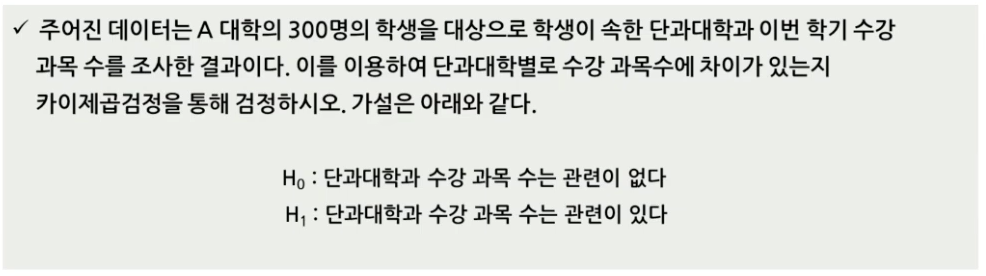

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# ㄴ 범주형 변수2개 / 카이제곱검정(독립성,동질성 검정) : chi2_contingency
# 데이터 생성
df = pd.DataFrame({'id' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   '단과대학' : ['경영', '경영', '경영', '경영', '경영', '공과', '공과', '공과', '공과', '공과', '의과', '의과', '의과', '의과', '의과' ],
                   '수강과목수' : ['4개', '4개', '4개', '5개', '6개', '4개', '4개', '4개', '6개', '6개', '4개', '5개', '6개', '6개', '6개']
                   })
# df.head()

# Q1. 주어진 데이터로 단과대학과 수강 과목 수로 분할표를 만들었을때,
#  수강 과목수가 '6개 이상' 인 학생 수가 가장 많은 단과대학을 출력하시오.
table = pd.crosstab(df['단과대학'], df['수강과목수'])#.reset_index()
print(table)

result = table[table['6개'] == table['6개'].max()].index[0]
print(result)

# Q2. 위의 가설을 검정하기 위한 검정통계량을 구하시오 (반올림하여 소수 둘째자리까지 계산)
x1 = table.loc['경영', :]
x2 = table.loc['공과', :]
x3 = table.loc['의과', :]

print(x1, x2, x3)
stats, pval, _, _ = stats.chi2_contingency(x1, x2, x3)
stats = round(stats, 2)
pval = round(pval, 4)
print(stats, pval)

# Q3. 위 통계량에 대한 p값을 구하고 (반올림하여 소수 넷째자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하시오
result = '채택'

if pval < 0.5:
  result = '기각'

print(result)

수강과목수  4개  5개  6개
단과대학             
경영      3   1   1
공과      3   0   2
의과      1   1   3
의과
수강과목수
4개    3
5개    1
6개    1
Name: 경영, dtype: int64 수강과목수
4개    3
5개    0
6개    2
Name: 공과, dtype: int64 수강과목수
4개    1
5개    1
6개    3
Name: 의과, dtype: int64
0.0 1.0
채택


###ANOVA

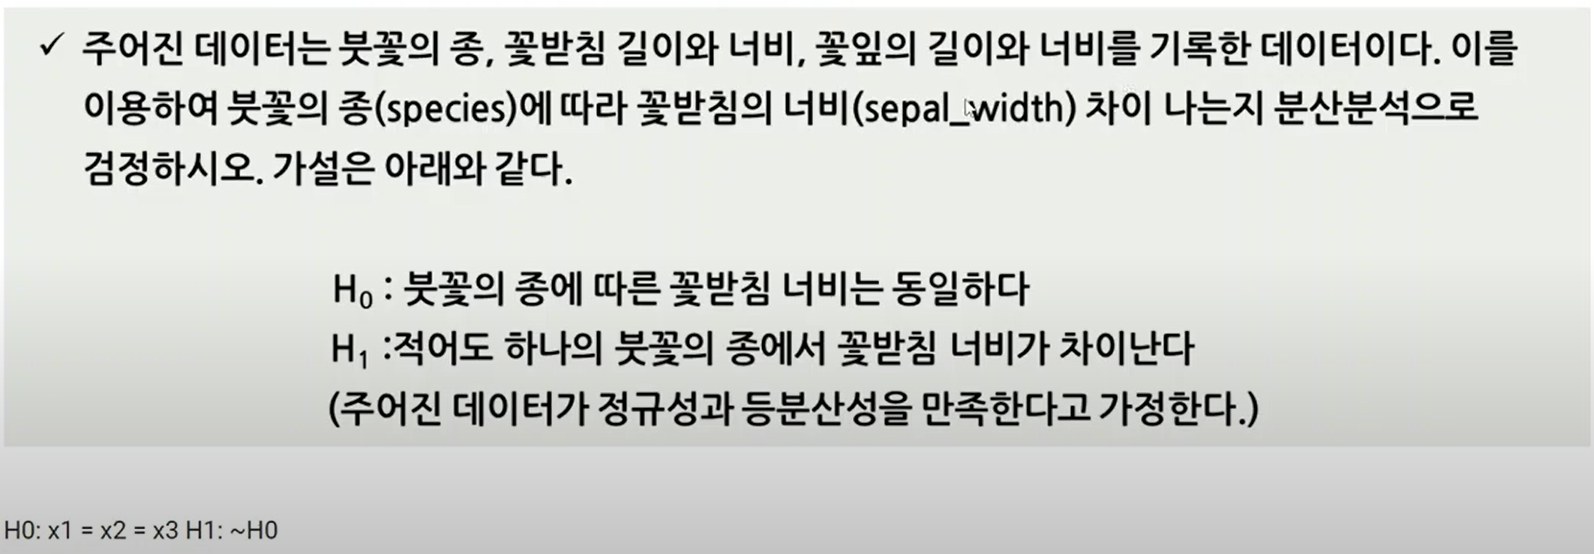

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns

# ㄴ 세집단의 평균비교 ANOVA : f_oneway
# 데이터 생성
df = sns.load_dataset('iris')
# df.head()

# Q1. versicolor 종의 평균 꽃받침 너비를 구하시오. (반올림하여 소수 둘째자리까지 계산)
xv = df['sepal_width'][df['species'] == 'versicolor'].mean()
# print(round(xv, 2))

# Q2. 위의 가설을 검정하기 위한 검정통계량을 구하시오 (반올림하여 소수 둘째자리까지 계산)
# print(df['species'].unique())
x1 = df['sepal_width'][df['species'] == 'setosa']
x2 = df['sepal_width'][df['species'] == 'versicolor']
x3 = df['sepal_width'][df['species'] == 'virginica']
print(len(x1), len(x2), len(x3))
stats, pval = stats.f_oneway(x1, x2, x3)
stats = round(stats, 2)
pval = round(pval, 4)
print(stats, pval)

# Q3. 위 통계량에 대한 p값을 구하고 (반올림하여 소수 넷째자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하시오
result = '채택'

if pval < 0.5:
  result = '기각'

print(result)

50 50 50
49.16 0.0
기각


In [ ]:
# 정규성 만족 검증 / 귀무가설 : 정규분포를 따른다
# ㄴ stats.shapiro()

# 등분산성 만족 검증 / 귀무가설 : 등분산성을 만족한다. (분산이 같다)
# ㄴ stats.levene()